**Data Preprocessing**

**Data cleaning Tasks** :
Handling missing values.
Correcting data entry errors.
Standardizing data formats.
Encoding categorical variables.
Removing duplicates or irrelevant data.

####Data Preparation

In [1]:
import pandas as pd

In [75]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/traincsv.csv')

<ipython-input-75-197ffe66ad2e>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/traincsv.csv')


In [4]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [6]:
df.describe()

,Customer_ID
count,7.741530e+05
mean,1.038708e+07
std,2.234795e+05
min,1.000000e+07
25%,1.019354e+07
50%,1.038708e+07
75%,1.058062e+07
max,1.077415e+07


In [77]:
df.describe(include='object')

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
count,774153,774120,774114,774125.00,774154
unique,20,143897,257030,270131.00,18
top,Colombo,1029.6,4296.6,9168.72,1
freq,41031,62,28,23.00,188975


In [8]:
df.shape

(774155, 6)

In [76]:
df.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,35
fresh_sales,41
dry_sales,30
cluster_catgeory,1


In [10]:
df.isna().sum()/len(df)*100

,0
Customer_ID,0.000258
outlet_city,0.000258
luxury_sales,0.004521
fresh_sales,0.005296
dry_sales,0.003875
cluster_catgeory,0.000129


##Identifying Missing Values
All the features has been identifies as having missing values

####Customer_ID

In [79]:
missing_index = df[df['Customer_ID'].isna()].index  # Find missing rows
missing_index

Index([497678, 497698], dtype='int64')

####outlet_city

In [81]:
#Replacing missing values in Customer_ID by assigning indexes
Index = df[df['outlet_city'].isna()].index

#Giving values for missing data
Rename = [f'Outlet {i+1}' for i in range(len(Index))]
df.loc[Index, 'outlet_city'] = Rename
df.describe()
df.isnull().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,35
fresh_sales,41
dry_sales,30
cluster_catgeory,1


####luxury_sales

In [82]:
# Convert numeric values stored as strings to float
df['luxury_sales'] = pd.to_numeric(df['luxury_sales'], errors='coerce')
df['luxury_sales'].dtype

dtype('float64')

In [83]:
#To check whether luxury_sales still has string values.
df.describe(include='object')

,outlet_city,fresh_sales,dry_sales,cluster_catgeory
count,774155,774114,774125.00,774154
unique,22,257030,270131.00,18
top,Colombo,4296.6,9168.72,1
freq,41031,28,23.00,188975


In [84]:
df.isna().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,45
fresh_sales,41
dry_sales,30
cluster_catgeory,1


<Axes: xlabel='luxury_sales', ylabel='Count'>

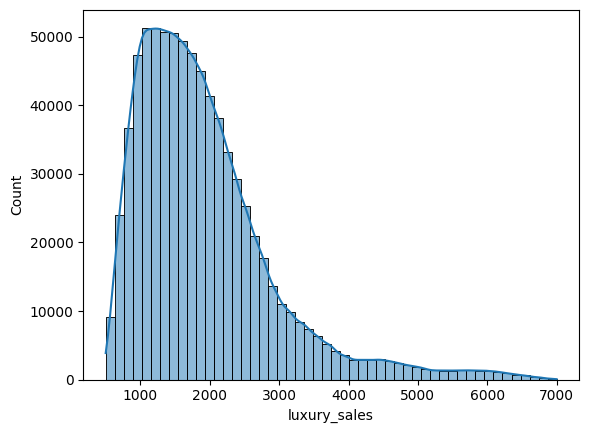

In [85]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(df['luxury_sales'], bins=50, kde=True)

Since its right skewwed using the median approah.

In [86]:
df['luxury_sales'].fillna(df['luxury_sales'].median(), inplace=True)

<ipython-input-86-30650a2f55ae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['luxury_sales'].fillna(df['luxury_sales'].median(), inplace=True)


In [87]:
df.isnull().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,0
fresh_sales,41
dry_sales,30
cluster_catgeory,1


####Fresh Sales

In [88]:
# Convert numeric values stored as strings to float
df['fresh_sales'] = pd.to_numeric(df['fresh_sales'], errors='coerce')
df['fresh_sales'].dtype

dtype('float64')

In [89]:
#To check whether fresh_sales still has string values.
df.describe(include='object')

,outlet_city,dry_sales,cluster_catgeory
count,774155,774125.00,774154
unique,22,270131.00,18
top,Colombo,9168.72,1
freq,41031,23.00,188975


In [90]:
df.isnull().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,0
fresh_sales,50
dry_sales,30
cluster_catgeory,1


<Axes: xlabel='fresh_sales', ylabel='Count'>

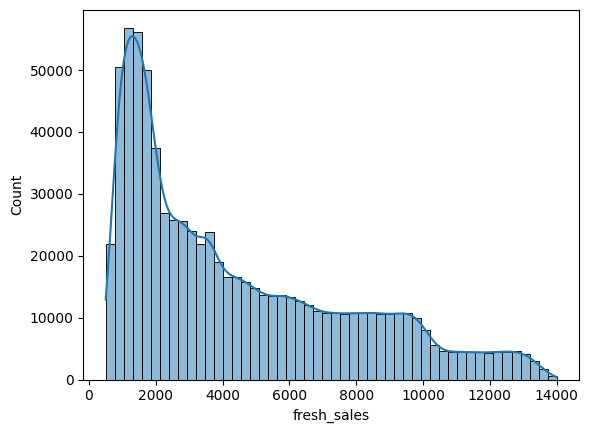

In [91]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(df['fresh_sales'], bins=50, kde=True)

In [92]:
df['fresh_sales'].fillna(df['fresh_sales'].median(), inplace=True)

<ipython-input-92-c6bbcd847499>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fresh_sales'].fillna(df['fresh_sales'].median(), inplace=True)


In [93]:
df.isnull().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,30
cluster_catgeory,1


####dry_sales

In [94]:
# Convert numeric values stored as strings to float
df['dry_sales'] = pd.to_numeric(df['dry_sales'], errors='coerce')
df['dry_sales'].dtype

dtype('float64')

In [95]:
#To check whether dry_sales still has string values.
df.describe(include='object')

,outlet_city,cluster_catgeory
count,774155,774154
unique,22,18
top,Colombo,1
freq,41031,188975


<Axes: xlabel='dry_sales', ylabel='Count'>

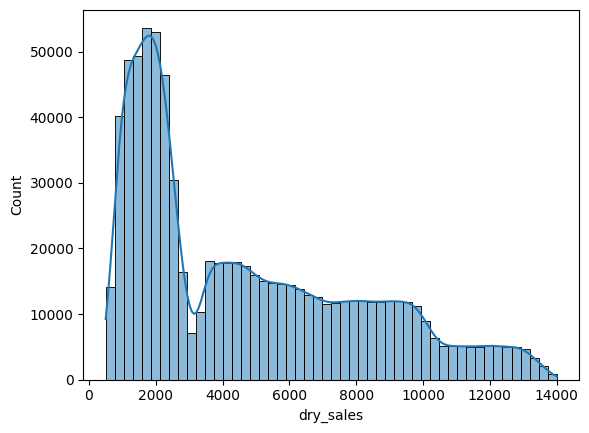

In [96]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(df['dry_sales'], bins=50, kde=True)

In [97]:
df['dry_sales'].fillna(df['dry_sales'].median(), inplace=True)

<ipython-input-97-2547818dc186>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dry_sales'].fillna(df['dry_sales'].median(), inplace=True)


In [98]:
df.isna().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_catgeory,1


####cluster_catgeory

In [99]:
df.describe(include = 'object')

,outlet_city,cluster_catgeory
count,774155,774154
unique,22,18
top,Colombo,1
freq,41031,188975


In [100]:
# Convert numeric values stored as strings to float
df['cluster_catgeory'] = pd.to_numeric(df['cluster_catgeory'], errors='coerce')
df['cluster_catgeory'].dtype

dtype('float64')

In [101]:
df.describe(include = 'object')

,outlet_city
count,774155
unique,22
top,Colombo
freq,41031


In [102]:
df.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
count,7.741530e+05,774155.000000,774155.000000,774155.000000,774153.000000
mean,1.038708e+07,1921.953241,4428.610797,4676.233840,3.292701
std,2.234795e+05,1004.050567,3334.558117,3409.309532,1.881905
min,1.000000e+07,500.000000,500.000000,500.000000,1.000000
25%,1.019354e+07,1213.560000,1620.220000,1788.000000,2.000000
50%,1.038708e+07,1715.280000,3356.480000,3727.760000,3.000000
75%,1.058062e+07,2338.650000,6671.280000,7161.760000,5.000000
max,1.077415e+07,6999.650000,13997.900000,13999.300000,100.000000


In [103]:
#Identifying outliers
valid_categories = [1, 2, 3, 4, 5, 6]
outliers = df[~df['cluster_catgeory'].isin(valid_categories)]
#Checking which outliers exist
print(outliers['cluster_catgeory'].unique())


[ 99.  nan  95.  98. 100.  89.]


In [104]:
#Removing outiers by replacing with Nan
import numpy as np
df.loc[~df['cluster_catgeory'].isin(valid_categories), 'cluster_catgeory'] = np.nan

#Applying mean
df['cluster_catgeory'].fillna(round(df['cluster_catgeory'].mean()), inplace=True)

print(df['cluster_catgeory'].unique())

[4. 1. 3. 2. 5. 6.]


<ipython-input-104-1b00139d6230>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cluster_catgeory'].fillna(round(df['cluster_catgeory'].mean()), inplace=True)


In [105]:
df.isna().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_catgeory,0


####Encoding Categorical variables

These features of the following dataset has been identified as categorical variables


1.   Outlet City



In [ ]:
df['outlet_city'].unique()

array(['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama',
       'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda',
       'Kotte', 'Nuwara Eliya', 'Batticaloa', 'Colombo', 'Jaffna',
       'Gampaha', 'Kalmunai', 'Galle', 'Katunayake', 'Negombo',
       'Trincomalee', 'Kandy', nan], dtype=object)

In [106]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

label_encoder = preprocessing.LabelEncoder()
df['outlet_city']= label_encoder.fit_transform(df['outlet_city'])

df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,11,1209.60,756.00,5292.00,4.0
1,10178643.0,13,1590.12,1060.08,6007.12,1.0
2,10513916.0,21,2288.88,1481.04,9155.52,4.0
3,10334589.0,21,2274.94,1739.66,9099.76,4.0
4,10458365.0,11,2345.49,2069.55,9243.99,4.0


In [107]:
df['outlet_city'].unique()

array([11, 13, 21,  5,  2, 18,  7, 19, 12, 15,  0,  1,  6,  4,  8,  3, 10,
       14, 20,  9, 16, 17])